In [1]:
from tensorflow.python.client import device_lib
for d in device_lib.list_local_devices():
    print(d.name, d.physical_device_desc)

/device:CPU:0 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
input_shape = (28, 28, 1)

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())         
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.2))                  
model.add(Dense(10, activation='softmax'))

opt = optimizers.Nadam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 - 19s - loss: 0.1717 - categorical_accuracy: 0.9480 - val_loss: 0.0634 - val_categorical_accuracy: 0.9801
Epoch 2/10
42000/42000 - 18s - loss: 0.0577 - categorical_accuracy: 0.9827 - val_loss: 0.0488 - val_categorical_accuracy: 0.9852
Epoch 3/10
42000/42000 - 18s - loss: 0.0386 - categorical_accuracy: 0.9881 - val_loss: 0.0467 - val_categorical_accuracy: 0.9870
Epoch 4/10
42000/42000 - 18s - loss: 0.0289 - categorical_accuracy: 0.9912 - val_loss: 0.0365 - val_categorical_accuracy: 0.9893
Epoch 5/10
42000/42000 - 18s - loss: 0.0230 - categorical_accuracy: 0.9925 - val_loss: 0.0475 - val_categorical_accuracy: 0.9868
Epoch 6/10
42000/42000 - 18s - loss: 0.0196 - categorical_accuracy: 0.9937 - val_loss: 0.0362 - val_categorical_accuracy: 0.9901
Epoch 7/10
42000/42000 - 19s - loss: 0.0144 - categorical_accuracy: 0.9950 - val_loss: 0.0450 - val_categorical_accuracy: 0.9883
Epoch 8/10
42000/42000 - 18s - loss: 0.0130 - c

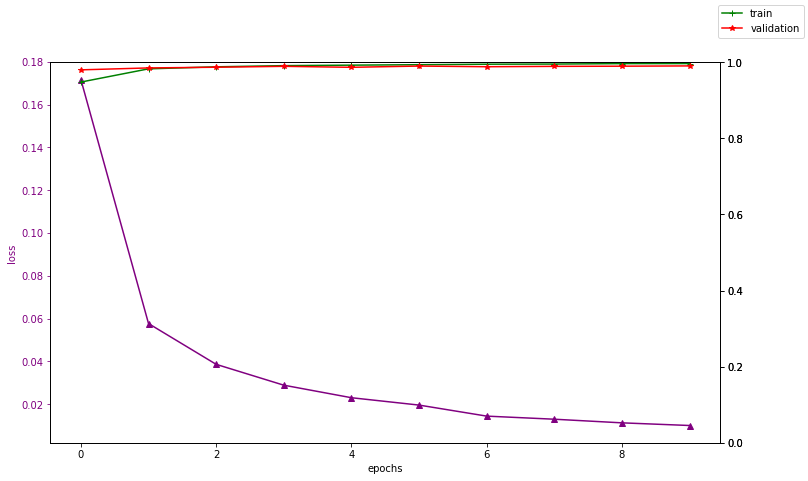

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['categorical_accuracy'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_categorical_accuracy'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.legend();

In [10]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0332 - categorical_accuracy: 0.9916


[0.03316390263706955, 0.9916]